<a href="https://colab.research.google.com/github/Zedbog/Data_science_course/blob/main/cv_day_2_z_zaj%C4%99%C4%87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Sprawdzenie podłączonej karty graficznej na jakiej pracujemy
!nvidia-smi

Sat Jan 30 08:18:31 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Konfiguracja


***WAŻNE*** 

Pamiętaj o włączeniu akceleracji GPU! Środowisko wykonawcze -> Zmień typ środowiska wykonawczego -> GPU

In [ ]:
import keras
import numpy as np
from matplotlib import pyplot as plt

# MLP for Computer Vision MNIST

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 7')

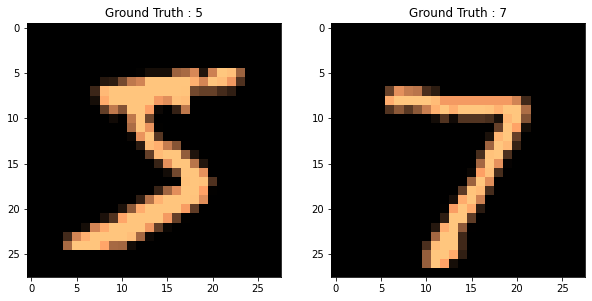

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from keras.utils import to_categorical # dane wejściowe w postaci kategorycznej

(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

print('Training data shape : ', train_x.shape, train_y.shape)
print('Testing data shape : ', test_x.shape, test_y.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_y)
classes_num = len(classes)
print('Total number of outputs : ', classes_num)
print('Output classes : ', classes)

plt.figure(figsize=[10,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_x[0,:,:], cmap='copper')
plt.title("Ground Truth : {}".format(train_y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_x[0,:,:], cmap='copper')
plt.title("Ground Truth : {}".format(test_y[0]))

In [ ]:
# Change from matrix to array of dimension 28x28 to array of dimension 784

train_x = train_x.reshape(train_x.shape[0], -1)
test_x = test_x.reshape(test_x.shape[0], -1)

# 0-255 to 0-1
train_x = train_x/255
test_x = test_x/255

# Change the labels from integer to categorical data
train_y_one_hot = keras.utils.to_categorical(train_y)
test_y_one_hot = keras.utils.to_categorical(test_y)

In [ ]:
# Make a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(train_x.shape[1],)))
model.add(Dense(512, activation='relu'))
model.add(Dense(classes_num, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_x, train_y_one_hot, 
                    batch_size=256, epochs=10, verbose=True, 
                    validation_data=(test_x, test_y_one_hot))

Epoch 1/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0077 - accuracy: 0.9975 - val_loss: 0.0974 - val_accuracy: 0.9823
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0077 - accuracy: 0.9977 - val_loss: 0.0939 - val_accuracy: 0.9825
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0058 - accuracy: 0.9980 - val_loss: 0.0879 - val_accuracy: 0.9838
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0056 - accuracy: 0.9981 - val_loss: 0.1135 - val_accuracy: 0.9824
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0052 - accuracy: 0.9986 - val_loss: 0.1124 - val_accuracy: 0.9821
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0042 - accuracy: 0.9988 - val_loss: 0.1219 - val_accuracy: 0.9828
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0036 - accuracy: 0.9989 - val_loss: 0.1271 - val_accuracy: 0.9807
Epoch 

In [ ]:
[test_loss, test_acc] = model.evaluate(test_x, test_y_one_hot)
print(f"Evaluation result on Test Data : Loss = {test_loss}, accuracy = {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.1264 - accuracy: 0.9833
Evaluation result on Test Data : Loss = 0.12643124163150787, accuracy = 0.983299970626831


In [ ]:
history.history.

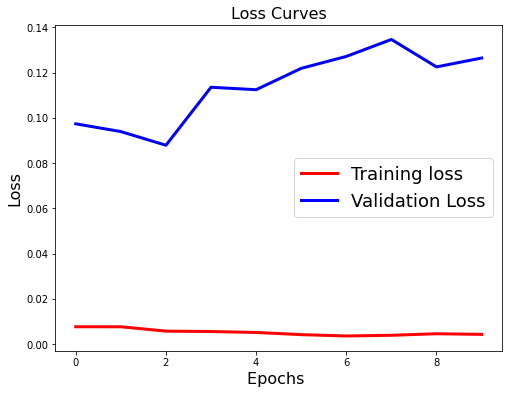

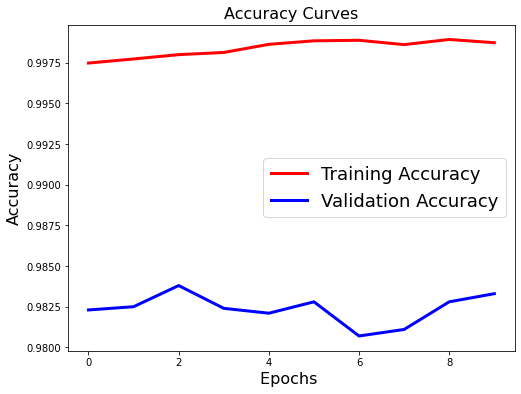

In [ ]:
def plot_history(history):
  #Plot the Loss Curves
  plt.figure(figsize=[8,6])
  plt.plot(history.history['loss'],'r',linewidth=3.0)
  plt.plot(history.history['val_loss'],'b',linewidth=3.0)
  plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
  plt.xlabel('Epochs ',fontsize=16)
  plt.ylabel('Loss',fontsize=16)
  plt.title('Loss Curves',fontsize=16)

  #Plot the Accuracy Curves
  plt.figure(figsize=[8,6]) 
  plt.plot(history.history['accuracy'], 'r', linewidth=3.0) 

  plt.plot(history.history['val_accuracy'], 'b',linewidth=3.0) 
  plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18) 
  plt.xlabel('Epochs ',fontsize=16) 
  plt.ylabel('Accuracy',fontsize=16) 
  plt.title('Accuracy Curves',fontsize=16)

plot_history(history)

# MLPClassifier fo MNIST

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
mlpc = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=0, max_iter=20, batch_size=256, verbose=True)
mlpc.fit(train_x, train_y_one_hot)
prediction = mlpc.predict(test_x)
print(f'{mlpc.__class__.__name__},\n{classification_report(test_y_one_hot, prediction)}\nAccuracy: {accuracy_score(test_y_one_hot, prediction)}\n')

Iteration 1, loss = 1.35330251
Iteration 2, loss = 0.59184127
Iteration 3, loss = 0.45372285
Iteration 4, loss = 0.37331020
Iteration 5, loss = 0.32020241
Iteration 6, loss = 0.28200671
Iteration 7, loss = 0.25188445
Iteration 8, loss = 0.22797849
Iteration 9, loss = 0.20740107
Iteration 10, loss = 0.18901937
Iteration 11, loss = 0.17382268
Iteration 12, loss = 0.15971621
Iteration 13, loss = 0.14820045
Iteration 14, loss = 0.13746513
Iteration 15, loss = 0.12845129
Iteration 16, loss = 0.12055962
Iteration 17, loss = 0.11199663
Iteration 18, loss = 0.10547459
Iteration 19, loss = 0.09864565
Iteration 20, loss = 0.09291771
MLPClassifier,
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.96      0.97      1032
           3       0.98      0.96      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.98      

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Operacje na array'ach - zrozumienie

In [ ]:
arra = np.array([[[1, 2, 4], [2,4,7], [6, 7,9], [1, 6, 7]],
                [[0, 0, 0], [1,1,1], [1, 1,1], [1, 1, 1]]])

In [ ]:
arra

array([[[1, 2, 4],
        [2, 4, 7],
        [6, 7, 9],
        [1, 6, 7]],

       [[0, 0, 0],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]])

In [ ]:
arra.shape

(2, 4, 3)

In [ ]:
arra = arra.reshape(arra.shape[0], -1)

In [ ]:
arra

array([[1, 2, 4, 2, 4, 7, 6, 7, 9, 1, 6, 7],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [ ]:
arra.shape

(2, 12)

# MLP for Computer Vision CIFAR10

In [ ]:
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()

print('X_train: ' + str(train_x.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_x.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (50000, 32, 32, 3)
Y_train: (50000, 1)
X_test:  (10000, 32, 32, 3)
Y_test:  (10000, 1)


Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)


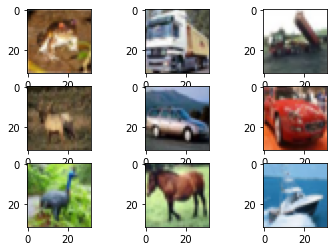

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras.utils import to_categorical

print('Training data shape : ', train_x.shape, train_y.shape)

print('Testing data shape : ', test_x.shape, test_y.shape)


# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(train_x[i])
# show the figure
plt.show()

In [ ]:
train_x

In [ ]:
# Change from matrix to array of dimension 28x28 to array of dimension 784

train_x = train_x.reshape(train_x.shape[0], -1) # pozostawia niezmieniony shape[0], a pozostałe wymiary spłąszcza do poziomu wierszy w macierzy shape[0] x (32*32*3)
test_x = test_x.reshape(test_x.shape[0], -1)

# 0-255 to 0-1
train_x = train_x/255
test_x = test_x/255

# Change the labels from integer to categorical data
train_y_one_hot = to_categorical(train_y) # zamienia np. [3] na [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
test_y_one_hot = to_categorical(test_y)

In [ ]:
train_x.shape

(50000, 3072)

In [ ]:
# Make a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(train_x.shape[1],)))
model.add(Dense(512, activation='relu'))
model.add(Dense(classes_num, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
# Definiujemy instancję klasy EarlyStopping
callback = EarlyStopping(
    monitor='val_accuracy', # parametr, który obserwuje
    patience = 7 # tyle czasu czeka po najzwyższym wyniku, aż zatrzyma uczenie
)
#Do model.fit dodajemy argument callbacks=callback (nasza instancja)
history = model.fit(train_x, train_y_one_hot, epochs=30, batch_size=256, verbose=1,
                    validation_data=(test_x, test_y_one_hot),
                    callbacks=callback)

Epoch 1/30
196/196 [==============================] - 2s 6ms/step - loss: 3.2630 - accuracy: 0.1800 - val_loss: 1.9501 - val_accuracy: 0.2884
Epoch 2/30
196/196 [==============================] - 1s 6ms/step - loss: 1.9029 - accuracy: 0.3116 - val_loss: 1.9843 - val_accuracy: 0.2939
Epoch 3/30
196/196 [==============================] - 1s 5ms/step - loss: 1.7944 - accuracy: 0.3545 - val_loss: 1.6851 - val_accuracy: 0.3893
Epoch 4/30
196/196 [==============================] - 1s 5ms/step - loss: 1.7031 - accuracy: 0.3884 - val_loss: 1.6885 - val_accuracy: 0.3915
Epoch 5/30
196/196 [==============================] - 1s 5ms/step - loss: 1.6517 - accuracy: 0.4086 - val_loss: 1.6121 - val_accuracy: 0.4287
Epoch 6/30
196/196 [==============================] - 1s 5ms/step - loss: 1.5983 - accuracy: 0.4297 - val_loss: 1.8453 - val_accuracy: 0.3609
Epoch 7/30
196/196 [==============================] - 1s 5ms/step - loss: 1.5604 - accuracy: 0.4421 - val_loss: 1.6451 - val_accuracy: 0.4338
Epoch 

In [ ]:
history = model.fit(train_x, train_y_one_hot, 
                    batch_size=256, epochs=30, verbose=True, 
                    validation_data=(test_x, test_y_one_hot))

Epoch 1/30
196/196 [==============================] - 2s 6ms/step - loss: 2.1444 - accuracy: 0.1990 - val_loss: 1.9424 - val_accuracy: 0.2926
Epoch 2/30
196/196 [==============================] - 1s 5ms/step - loss: 1.9315 - accuracy: 0.3011 - val_loss: 1.8780 - val_accuracy: 0.3273
Epoch 3/30
196/196 [==============================] - 1s 5ms/step - loss: 1.8607 - accuracy: 0.3322 - val_loss: 1.8402 - val_accuracy: 0.3402
Epoch 4/30
196/196 [==============================] - 1s 5ms/step - loss: 1.7875 - accuracy: 0.3587 - val_loss: 1.7757 - val_accuracy: 0.3586
Epoch 5/30
196/196 [==============================] - 1s 5ms/step - loss: 1.7381 - accuracy: 0.3759 - val_loss: 1.7363 - val_accuracy: 0.3676
Epoch 6/30
196/196 [==============================] - 1s 5ms/step - loss: 1.7076 - accuracy: 0.3854 - val_loss: 1.6584 - val_accuracy: 0.4051
Epoch 7/30
196/196 [==============================] - 1s 5ms/step - loss: 1.6653 - accuracy: 0.4034 - val_loss: 1.7283 - val_accuracy: 0.3693
Epoch 

In [ ]:
[test_loss, test_acc] = model.evaluate(test_x, test_y_one_hot)
print(f"Evaluation result on Test Data : Loss = {test_loss}, accuracy = {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 1.6055 - accuracy: 0.4566
Evaluation result on Test Data : Loss = 1.6054884195327759, accuracy = 0.45660001039505005


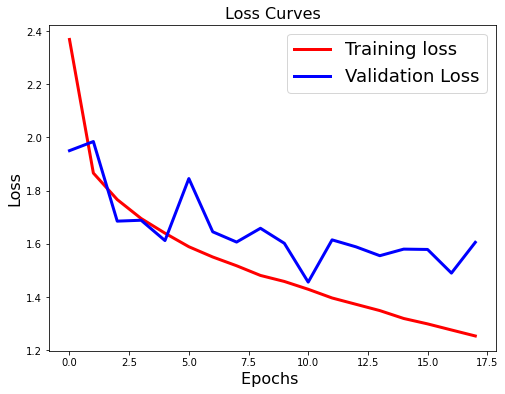

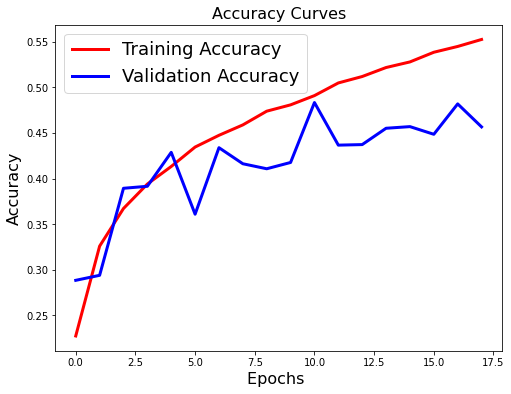

In [ ]:
plot_history(history)

# First CNN for CIFAR10

In [ ]:
import keras
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, AveragePooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping

(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()
# 0-255 to 0-1
train_x = train_x/255
test_x = test_x/255

# Change the labels from integer to categorical data
train_y_one_hot = to_categorical(train_y)
test_y_one_hot = to_categorical(test_y)

In [ ]:
print('X_train: ' + str(train_x.shape))
print('Y_train: ' + str(train_y.shape))
print('Y_train_one_hot: ' + str(train_y_one_hot.shape))
print('X_test:  '  + str(test_x.shape))
print('Y_test:  '  + str(test_y.shape))
print('Y_test_one_hot: ' + str(test_y_one_hot.shape))

X_train: (50000, 32, 32, 3)
Y_train: (50000, 1)
Y_train_one_hot: (50000, 10)
X_test:  (10000, 32, 32, 3)
Y_test:  (10000, 1)
Y_test_one_hot: (10000, 10)


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3))) # Conv2D(32, (3, 3) = 32 neurony, kernel wielkości 3x3 który czyta obraz przechodząc o jeden
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# stride

In [ ]:
# compile model
opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# fit model
history = model.fit(train_x, train_y_one_hot, epochs=30, batch_size=64, validation_data=(test_x, test_y_one_hot), verbose=1, callbacks= EarlyStopping(monitor='val_accuracy', patience=7))
# evaluate model
_, acc = model.evaluate(test_x, test_y_one_hot, verbose=1)

Epoch 1/30
782/782 [==============================] - 14s 8ms/step - loss: 1.9831 - accuracy: 0.2795 - val_loss: 1.4398 - val_accuracy: 0.4817
Epoch 2/30
782/782 [==============================] - 6s 7ms/step - loss: 1.4190 - accuracy: 0.4895 - val_loss: 1.2613 - val_accuracy: 0.5520
Epoch 3/30
782/782 [==============================] - 6s 7ms/step - loss: 1.2256 - accuracy: 0.5625 - val_loss: 1.1806 - val_accuracy: 0.5748
Epoch 4/30
782/782 [==============================] - 6s 7ms/step - loss: 1.0795 - accuracy: 0.6203 - val_loss: 1.0667 - val_accuracy: 0.6174
Epoch 5/30
782/782 [==============================] - 6s 8ms/step - loss: 0.9619 - accuracy: 0.6618 - val_loss: 1.0008 - val_accuracy: 0.6504
Epoch 6/30
782/782 [==============================] - 6s 8ms/step - loss: 0.8805 - accuracy: 0.6982 - val_loss: 0.9199 - val_accuracy: 0.6773
Epoch 7/30
782/782 [==============================] - 6s 8ms/step - loss: 0.8013 - accuracy: 0.7216 - val_loss: 0.9653 - val_accuracy: 0.6664
Epoch

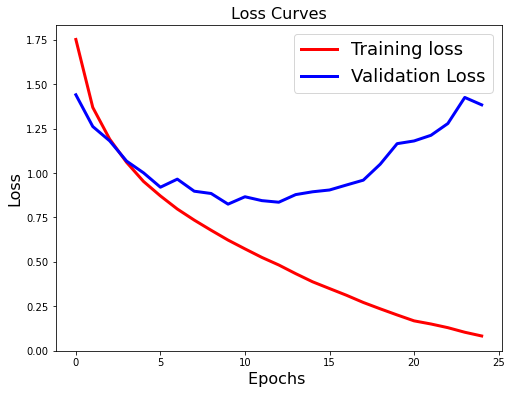

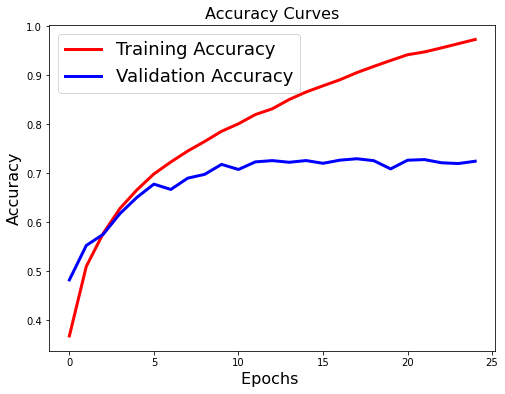

In [ ]:
def plot_history(history):
  #Plot the Loss Curves
  plt.figure(figsize=[8,6])
  plt.plot(history.history['loss'],'r',linewidth=3.0)
  plt.plot(history.history['val_loss'],'b',linewidth=3.0)
  plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
  plt.xlabel('Epochs ',fontsize=16)
  plt.ylabel('Loss',fontsize=16)
  plt.title('Loss Curves',fontsize=16)

  #Plot the Accuracy Curves
  plt.figure(figsize=[8,6]) 
  plt.plot(history.history['accuracy'], 'r', linewidth=3.0) 

  plt.plot(history.history['val_accuracy'], 'b',linewidth=3.0) 
  plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18) 
  plt.xlabel('Epochs ',fontsize=16) 
  plt.ylabel('Accuracy',fontsize=16) 
  plt.title('Accuracy Curves',fontsize=16)

plot_history(history)

# CNN with BN i Dropout


In [ ]:
from keras.layers import Dropout
from keras.layers import BatchNormalization

# BatchNormalization

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
# compile model
opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# fit model
history = model.fit(train_x, train_y_one_hot, epochs=30, batch_size=64, validation_data=(test_x, test_y_one_hot), verbose=1)
# evaluate model
_, acc = model.evaluate(test_x, test_y_one_hot, verbose=1)

Epoch 1/30
782/782 [==============================] - 8s 10ms/step - loss: 2.4836 - accuracy: 0.2525 - val_loss: 1.4999 - val_accuracy: 0.4557
Epoch 2/30
782/782 [==============================] - 7s 9ms/step - loss: 1.5879 - accuracy: 0.4251 - val_loss: 1.3890 - val_accuracy: 0.5056
Epoch 3/30
782/782 [==============================] - 7s 9ms/step - loss: 1.4109 - accuracy: 0.4819 - val_loss: 1.8131 - val_accuracy: 0.3808
Epoch 4/30
782/782 [==============================] - 7s 9ms/step - loss: 1.3019 - accuracy: 0.5285 - val_loss: 1.3310 - val_accuracy: 0.5252
Epoch 5/30
782/782 [==============================] - 7s 9ms/step - loss: 1.2254 - accuracy: 0.5535 - val_loss: 1.3842 - val_accuracy: 0.5117
Epoch 6/30
782/782 [==============================] - 7s 9ms/step - loss: 1.1664 - accuracy: 0.5803 - val_loss: 1.1950 - val_accuracy: 0.5731
Epoch 7/30
782/782 [==============================] - 7s 9ms/step - loss: 1.1034 - accuracy: 0.6064 - val_loss: 1.0192 - val_accuracy: 0.6290
Epoch

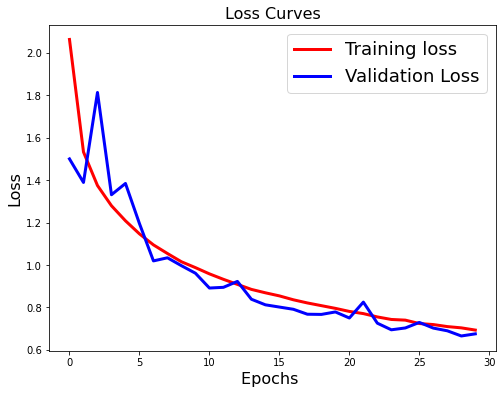

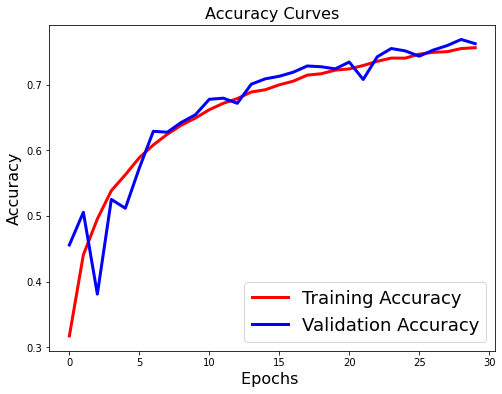

In [ ]:
plot_history(history)

# MobileNet

Niestety MobileNet nie jest przystosowany do tak małych obrazów. 

In [ ]:
from keras.models import Model
from keras.applications import MobileNetV2

(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()
# 0-255 to 0-1
train_x = train_x/255
test_x = test_x/255

# Change the labels from integer to categorical data
train_y_one_hot = to_categorical(train_y)
test_y_one_hot = to_categorical(test_y)

model = MobileNetV2(input_shape=(train_x.shape[1], train_x.shape[2], 3),
                    classes=10, include_top=False, weights=None)

x=model.layers[-1].output
x=keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
flatten=Flatten()(x)
predictions=Dense(10, activation='softmax')(flatten)
model = Model(inputs=model.input, outputs=predictions)  

# compile model
opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# fit model
history = model.fit(train_x, train_y_one_hot, epochs=30, batch_size=64, 
                    validation_data=(test_x, test_y_one_hot), verbose=1)
# evaluate model
_, acc = model.evaluate(test_x, test_y_one_hot, verbose=1)

Epoch 1/30
782/782 [==============================] - 17s 17ms/step - loss: 2.3166 - accuracy: 0.2087 - val_loss: 2.3784 - val_accuracy: 0.1000
Epoch 2/30
782/782 [==============================] - 12s 16ms/step - loss: 1.7133 - accuracy: 0.3793 - val_loss: 2.3539 - val_accuracy: 0.1000
Epoch 3/30
782/782 [==============================] - 13s 16ms/step - loss: 1.5258 - accuracy: 0.4432 - val_loss: 2.3914 - val_accuracy: 0.1000
Epoch 4/30
782/782 [==============================] - 13s 16ms/step - loss: 1.4350 - accuracy: 0.4843 - val_loss: 2.4028 - val_accuracy: 0.1000
Epoch 5/30
782/782 [==============================] - 13s 16ms/step - loss: 1.3636 - accuracy: 0.5065 - val_loss: 2.3891 - val_accuracy: 0.1000
Epoch 6/30
782/782 [==============================] - 13s 16ms/step - loss: 1.2969 - accuracy: 0.5310 - val_loss: 2.3446 - val_accuracy: 0.1066
Epoch 7/30
782/782 [==============================] - 13s 16ms/step - loss: 1.2335 - accuracy: 0.5566 - val_loss: 2.1686 - val_accuracy:

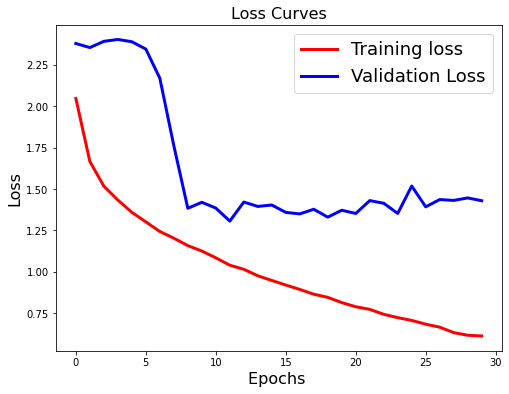

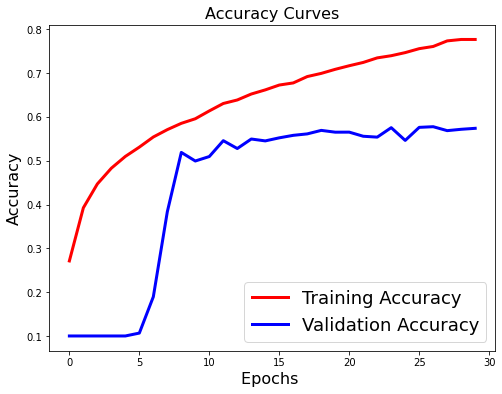

In [ ]:
plot_history(history)

# Sesja samodzielna

Stwórz własną sieć konwolucyjną, której zadaniem będzie klasyfikacja obrazków pochodzących ze zbioru CIFAR100

https://www.cs.toronto.edu/~kriz/cifar.html

Pamiętaj, by w dodać GPU w ustawieniach środowiska wykonawczego
Wynikiem podziel się na slacku, niech wygra najlepszy! ;)

Do zbadania:


*   Optymalna ilość warstw, jak wpływają na działanie warstwy DropOut i BatchNormalization?
*   Rodzaje filtrów
*   Hiperparametry dotyczące uczenia sieci
*   Optymalna ilość epok
*   Wybór optimizera
*   Sposób inicjalizacji wag


> Polecam nie szukać gotowych rozwiązań ;)

Poniżej kilka podpowiedzi:

In [ ]:
import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, AveragePooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from tensorflow.keras.applications import EfficientNetB0, MobileNetV2
from keras.models import Model

 # Metoda prób i błędów

In [ ]:
# Load dataset
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar100.load_data()

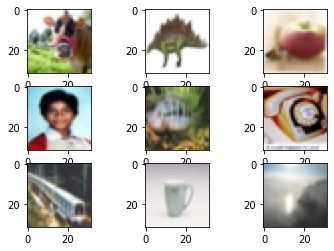

In [ ]:
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(train_x[i])
# show the figure
plt.show()

In [ ]:
# Change from matrix to array of dimension 28x28 to array of dimension 784
# train_x = train_x.reshape(train_x.shape[0], -1) # pozostawia niezmieniony shape[0], a pozostałe wymiary spłąszcza do poziomu wierszy w macierzy shape[0] x (32*32*3)
# test_x = test_x.reshape(test_x.shape[0], -1)

# 0-255 to 0-1
train_x = train_x/255
test_x = test_x/255

# Change the labels from integer to categorical data
train_y_one_hot = to_categorical(train_y)
test_y_one_hot = to_categorical(test_y)

In [ ]:
print('X_train: ' + str(train_x.shape))
print('Y_train: ' + str(train_y.shape))
print('Y_train_one_hot: ' + str(train_y_one_hot.shape))
print('X_test:  '  + str(test_x.shape))
print('Y_test:  '  + str(test_y.shape))
print('Y_test_one_hot: ' + str(test_y_one_hot.shape))

X_train: (50000, 32, 32, 3)
Y_train: (50000, 1)
Y_train_one_hot: (50000, 100)
X_test:  (10000, 32, 32, 3)
Y_test:  (10000, 1)
Y_test_one_hot: (10000, 100)


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='random_normal', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='random_normal', padding='same'))
model.add(BatchNormalization())
model.add(AveragePooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='random_normal', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='random_normal', padding='same'))
model.add(BatchNormalization())
model.add(AveragePooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='random_normal', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='random_normal', padding='same'))
model.add(BatchNormalization())
model.add(AveragePooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='random_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(100, activation='softmax'))

In [ ]:
# compile model
opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
adam_opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam_opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Do model.fit dodajemy argument callbacks=callback (nasza instancja)
history = model.fit(train_x, train_y_one_hot, epochs=50, batch_size=256, verbose=True,
                    validation_data=(test_x, test_y_one_hot),
                    callbacks= EarlyStopping(monitor='val_accuracy', # parametr, który obserwuje
                                            patience = 7)) # tyle czasu czeka po najwyższym wyniku, aż zatrzyma uczenie)

Epoch 1/50
196/196 [==============================] - 7s 30ms/step - loss: 4.6068 - accuracy: 0.0478 - val_loss: 5.3766 - val_accuracy: 0.0104
Epoch 2/50
196/196 [==============================] - 6s 29ms/step - loss: 3.6870 - accuracy: 0.1458 - val_loss: 4.7921 - val_accuracy: 0.0299
Epoch 3/50
196/196 [==============================] - 6s 29ms/step - loss: 3.2708 - accuracy: 0.2097 - val_loss: 3.1741 - val_accuracy: 0.2349
Epoch 4/50
196/196 [==============================] - 6s 29ms/step - loss: 2.9429 - accuracy: 0.2668 - val_loss: 2.7549 - val_accuracy: 0.3092
Epoch 5/50
196/196 [==============================] - 6s 28ms/step - loss: 2.7016 - accuracy: 0.3129 - val_loss: 2.5483 - val_accuracy: 0.3426
Epoch 6/50
196/196 [==============================] - 6s 28ms/step - loss: 2.5285 - accuracy: 0.3451 - val_loss: 2.2950 - val_accuracy: 0.3982
Epoch 7/50
196/196 [==============================] - 6s 28ms/step - loss: 2.3999 - accuracy: 0.3738 - val_loss: 2.2081 - val_accuracy: 0.4170

In [ ]:
[test_loss, test_acc] = model.evaluate(test_x, test_y_one_hot)
print(f"Evaluation result on Test Data : Loss = {test_loss}, accuracy = {test_acc}")

313/313 [==============================] - 1s 4ms/step - loss: 1.4859 - accuracy: 0.5935
Evaluation result on Test Data : Loss = 1.485902190208435, accuracy = 0.593500018119812


In [ ]:
def plot_history(history):
  #Plot the Loss Curves
  plt.figure(figsize=[8,6])
  plt.plot(history.history['loss'],'r',linewidth=3.0)
  plt.plot(history.history['val_loss'],'b',linewidth=3.0)
  plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
  plt.xlabel('Epochs ',fontsize=16)
  plt.ylabel('Loss',fontsize=16)
  plt.title('Loss Curves',fontsize=16)

  #Plot the Accuracy Curves
  plt.figure(figsize=[8,6]) 
  plt.plot(history.history['accuracy'], 'r', linewidth=3.0) 

  plt.plot(history.history['val_accuracy'], 'b',linewidth=3.0) 
  plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18) 
  plt.xlabel('Epochs ',fontsize=16) 
  plt.ylabel('Accuracy',fontsize=16) 
  plt.title('Accuracy Curves',fontsize=16)

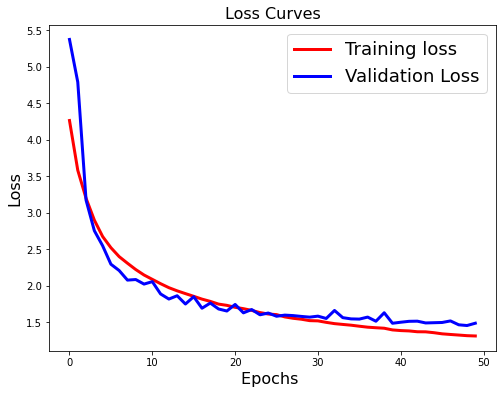

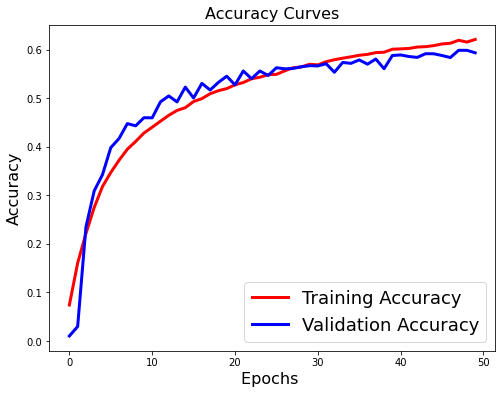

In [ ]:
plot_history(history)

# EfficientNet & MobileNet

```
# Sformatowano jako kod
```



In [ ]:
model.add(Dense(128, activation='relu', kernel_initializer='random_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(100, activation='softmax'))

In [ ]:
# model = EfficientNetB0(weights=None, input_shape=(train_x.shape[1], train_x.shape[2], 3), classes=100, include_top=True)

model = MobileNetV2(input_shape=(train_x.shape[1], train_x.shape[2], 3),
                    classes=100, include_top=False, weights=None)

x=model.layers[-1].output
x=keras.layers.BatchNormalization()(x)
flatten=Flatten()(x)

predictions=Dense(100, activation='softmax')(flatten)
model = Model(inputs=model.input, outputs=predictions)  

# compile model
opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
adam_opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam_opt, loss='categorical_crossentropy', metrics=['accuracy'])

# fit model
history = model.fit(train_x, train_y_one_hot, epochs=50, batch_size=256, 
                    validation_data=(test_x, test_y_one_hot), verbose=True, callbacks= EarlyStopping(monitor='val_accuracy', patience=7))
# evaluate model
_, acc = model.evaluate(test_x, test_y_one_hot, verbose=True)

Epoch 1/50
196/196 [==============================] - 12s 40ms/step - loss: 4.7796 - accuracy: 0.0323 - val_loss: 4.6714 - val_accuracy: 0.0100
Epoch 2/50
196/196 [==============================] - 7s 34ms/step - loss: 3.9499 - accuracy: 0.0936 - val_loss: 4.7248 - val_accuracy: 0.0100
Epoch 3/50
196/196 [==============================] - 7s 34ms/step - loss: 3.6533 - accuracy: 0.1355 - val_loss: 4.7643 - val_accuracy: 0.0100
Epoch 4/50
196/196 [==============================] - 7s 35ms/step - loss: 3.5794 - accuracy: 0.1557 - val_loss: 4.7787 - val_accuracy: 0.0100
Epoch 5/50
196/196 [==============================] - 7s 35ms/step - loss: 3.4173 - accuracy: 0.1847 - val_loss: 4.8388 - val_accuracy: 0.0100
Epoch 6/50
196/196 [==============================] - 7s 35ms/step - loss: 3.2525 - accuracy: 0.2088 - val_loss: 4.8430 - val_accuracy: 0.0100
Epoch 7/50
196/196 [==============================] - 7s 35ms/step - loss: 3.2887 - accuracy: 0.2090 - val_loss: 4.8538 - val_accuracy: 0.010

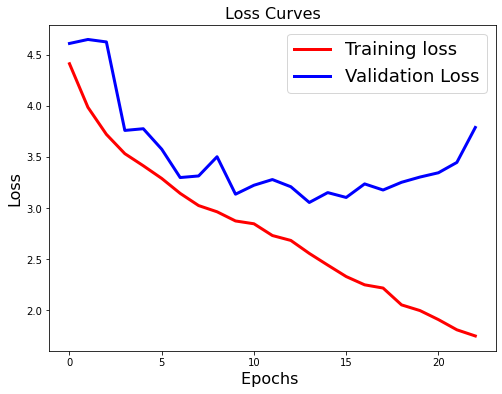

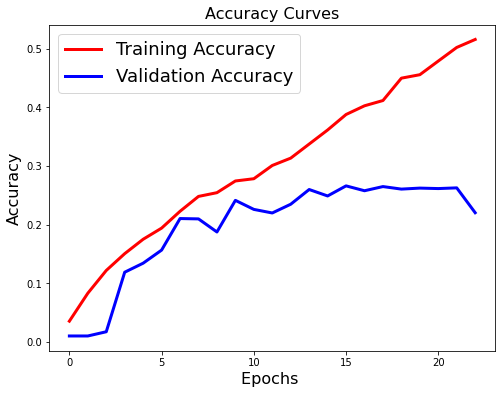

In [ ]:
plot_history(history)

# Podpowiedzi

1. Pobranie bazy danychw

In [ ]:
import keras

(train_x, train_y), (test_x, test_y) = keras.datasets.cifar100.load_data()

2. Image processing

In [ ]:
# 0-255 to 0-1
train_x = train_x/255
test_x = test_x/255

# Change the labels from integer to categorical data
train_y_one_hot = keras.utils.to_categorical(train_y)
test_y_one_hot = keras.utils.to_categorical(test_y)

3. Sprawdzenie zawartości danych

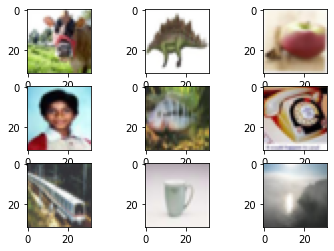

(50000, 32, 32, 3)


In [ ]:
import matplotlib.pyplot as plt

# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(train_x[i])
# show the figure
plt.show()

print(train_x.shape)

4. Proste konwolucje



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(100, activation='softmax'))

opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_x, train_y_one_hot, 
                    batch_size=256, epochs=50, verbose=True, 
                    validation_data=(test_x, test_y_one_hot))

Epoch 1/50
196/196 [==============================] - 12s 24ms/step - loss: 4.6444 - accuracy: 0.0132 - val_loss: 4.5494 - val_accuracy: 0.0227
Epoch 2/50
196/196 [==============================] - 4s 22ms/step - loss: 4.5116 - accuracy: 0.0283 - val_loss: 4.3468 - val_accuracy: 0.0509
Epoch 3/50
196/196 [==============================] - 4s 22ms/step - loss: 4.2748 - accuracy: 0.0627 - val_loss: 4.1033 - val_accuracy: 0.0799
Epoch 4/50
196/196 [==============================] - 4s 22ms/step - loss: 4.0552 - accuracy: 0.0928 - val_loss: 3.9478 - val_accuracy: 0.1089
Epoch 5/50
196/196 [==============================] - 4s 22ms/step - loss: 3.8928 - accuracy: 0.1188 - val_loss: 3.7970 - val_accuracy: 0.1367
Epoch 6/50
196/196 [==============================] - 4s 22ms/step - loss: 3.7650 - accuracy: 0.1409 - val_loss: 3.6966 - val_accuracy: 0.1511
Epoch 7/50
196/196 [==============================] - 4s 22ms/step - loss: 3.6187 - accuracy: 0.1650 - val_loss: 3.5715 - val_accuracy: 0.169

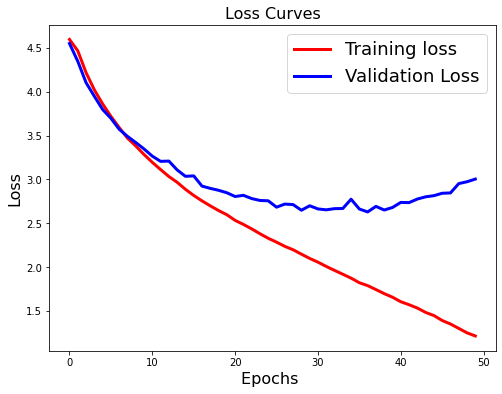

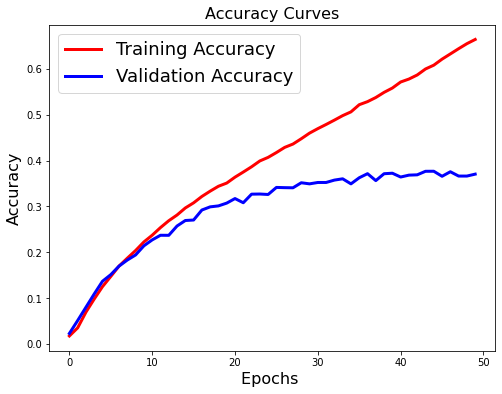

In [ ]:
plot_history(history)

Link do benchmarka

https://paperswithcode.com/sota/image-classification-on-cifar-100